### Bilateral Filter

##### Implementación de la técnica de suavizado de imágenes que reduce el ruido mientras preserva los bordes. Funciona aplicando un promedio ponderado de los píxeles vecinos, donde la ponderación depende tanto de la cercanía espacial (distancia entre píxeles) como de la similitud de intensidad (diferencia de color), lo que evita difuminar los bordes fuertes

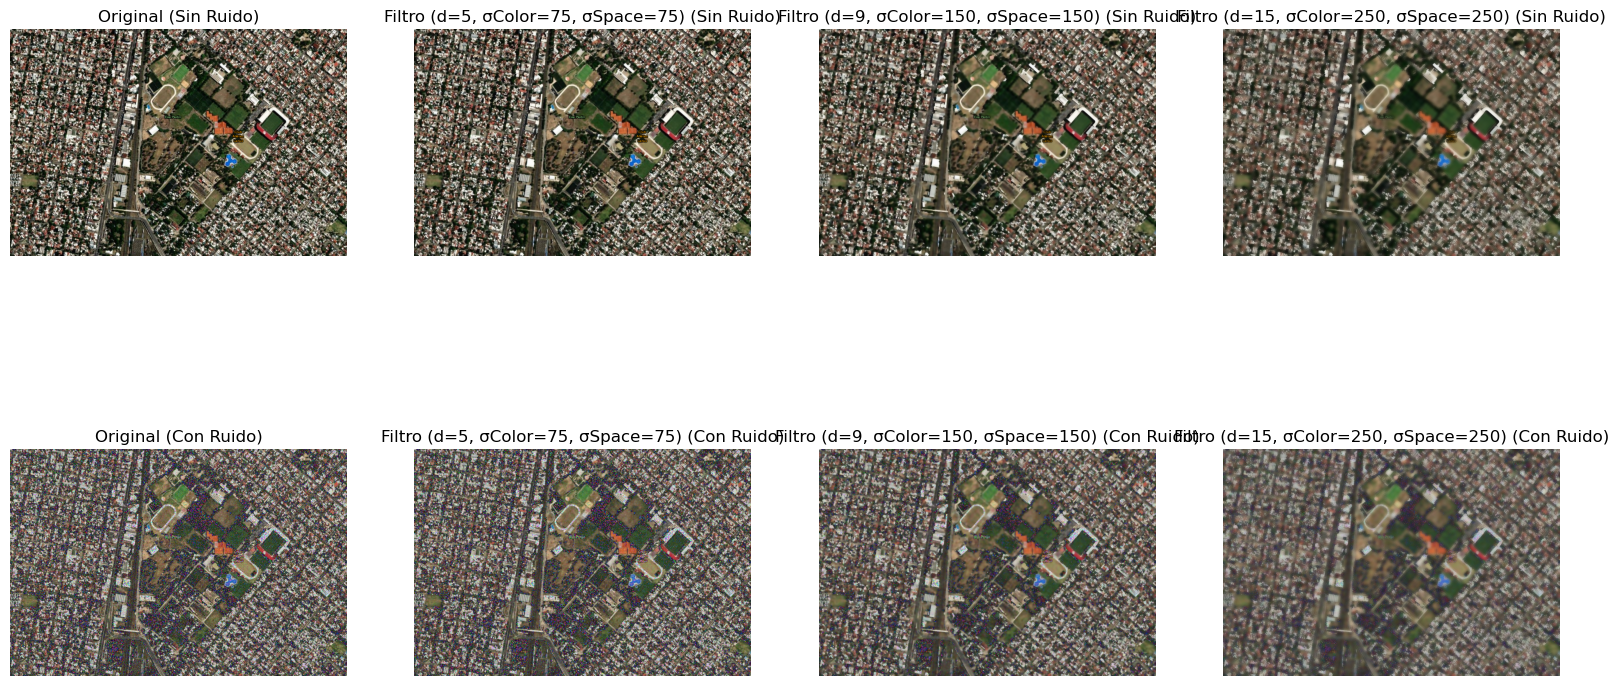

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Función para añadir ruido gaussiano
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    gaussian_noise = np.random.normal(mean, stddev, image.shape)
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Leer la imagen en color
imagen = cv2.imread("lanus.png")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Generar imagen con ruido gaussiano
imagen_ruido_gaussiano = add_gaussian_noise(imagen_rgb, 0, 25, 70)

# Aplicar filtro bilateral en la imagen original
filtros_original = [
    imagen_rgb,
    cv2.bilateralFilter(imagen_rgb, d=5, sigmaColor=75, sigmaSpace=75),
    cv2.bilateralFilter(imagen_rgb, d=9, sigmaColor=150, sigmaSpace=150),
    cv2.bilateralFilter(imagen_rgb, d=15, sigmaColor=250, sigmaSpace=250)
]

# Aplicar filtro bilateral en la imagen con ruido
filtros_ruido = [
    imagen_ruido_gaussiano,
    cv2.bilateralFilter(imagen_ruido_gaussiano, d=5, sigmaColor=75, sigmaSpace=75),
    cv2.bilateralFilter(imagen_ruido_gaussiano, d=9, sigmaColor=150, sigmaSpace=150),
    cv2.bilateralFilter(imagen_ruido_gaussiano, d=15, sigmaColor=250, sigmaSpace=250)
]

# Configuración de la figura
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Títulos para los filtros
titulos = ["Original", "Filtro (d=5, σColor=75, σSpace=75)",
           "Filtro (d=9, σColor=150, σSpace=150)", "Filtro (d=15, σColor=250, σSpace=250)"]

# Mostrar imágenes originales y con ruido
for i in range(4):
    axes[0, i].imshow(filtros_original[i])
    axes[0, i].set_title(f"{titulos[i]} (Sin Ruido)")
    axes[0, i].axis("off")

    axes[1, i].imshow(filtros_ruido[i])
    axes[1, i].set_title(f"{titulos[i]} (Con Ruido)")
    axes[1, i].axis("off")

plt.show()


## Conclusiones

- **Efectividad del Filtro Bilateral en la Imagen Original**:
   - En la imagen sin ruido, el filtro bilateral suaviza las áreas uniformes manteniendo los bordes. A medida que aumentan los valores de `d`, `sigmaColor`, y `sigmaSpace`, se observa un mayor nivel de suavizado, pero con una perdida en los bordes.

- **Efectividad del Filtro Bilateral en la Imagen con Ruido**:
   - En la imagen con ruido, el filtro bilateral ayuda a reducir el ruido gaussiano preservando en gran medida los bordes. Los parámetros más altos (`d=15`, `sigmaColor=250`, `sigmaSpace=250`) suavizan mejor el ruido, pero se ve que pierde mucho la nitidez de la imagen.
   - La versión con valores intermedios (`d=9`, `sigmaColor=150`, `sigmaSpace=150`) parece ser la que provee un mejor equilibrio entre la reducción de ruido y la preservación de los detalles en la imagen.
